# Análise de Dados do dataset "PPM (Pesquisa da Pecuária Municipal) Rebanhos Efetivos"
O dataset usado para essa análise de dados refere-se principalmente aos números detalhados de animais criados (efetivos pecuários) divulgados pelo IBGE na Pesquisa da Pecuária Municipal, como bovinos, suínos e galináceos. O dataset está disponível gratuitamente para consulta no site 'https://basedosdados.org'. OBS: os dados do dataset estão no intervalo de 1974-2022.

## A análise deste dataset tem como principais objetivos:

* Entender o histórico da evolução no número de tipos de rebanho por ano, isto é, quais tipos de rebanhos tiveram aumento ou decaíram;
* A partir dessa análise, partindo para um contexto mais recente, o próximo passo é verificar o tipo de rebanho com maior crescimento na última década;
* Verificar quais estados e regiões lideram a produção de cada tipo de rebanho;
* Quais municípios são os maiores produtores.

## Importando bibliotecas

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install geopandas
import geopandas as gpd

## Importando os dados que serão usados para análise

In [133]:
df_rebanhos = pd.read_csv("C:/Users/win/Documents/br_ibge_ppm_efetivo_rebanhos.csv")
df_rebanhos.sort_values(by='ano', ascending=False)

,ano,sigla_uf,id_municipio,tipo_rebanho,quantidade
108469,2022,MA,2105989,Equino,1349
108468,2022,MA,2105963,Equino,608
108467,2022,MA,2105450,Equino,385
108466,2022,MA,2105351,Equino,1733
108465,2022,MA,2104701,Equino,314
...,...,...,...,...,...
710566,1974,AL,2700805,Caprino,225
710565,1974,AL,2700706,Caprino,133
710564,1974,AL,2700607,Caprino,10
710563,1974,AL,2700300,Caprino,1003


## Compreendendo os dados

In [134]:
df_rebanhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368144 entries, 0 to 1368143
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ano           1368144 non-null  int64 
 1   sigla_uf      1368144 non-null  object
 2   id_municipio  1368144 non-null  int64 
 3   tipo_rebanho  1368144 non-null  object
 4   quantidade    1368144 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 52.2+ MB


In [155]:
pd.options.display.float_format = '{:,.0f}'.format
df_rebanhos[['ano', 'quantidade']].describe()

,ano,quantidade
count,"1,368,144","1,368,144"
mean,"2,001","15,495"
std,14,"101,429"
min,"1,974",0
25%,"1,989",299
50%,"2,002","1,750"
75%,"2,013","8,845"
max,"2,022","22,178,409"


## Verificando se há necessidade de tratamento de dados
O método ".isna()" verifica a existência de dados nulos (Non available).
**Conclusão**: não existem dados nulos e nem repetidos (apesar que valores repetidos poderiam ser mantidos, já que poderiam existir coincidências nos valores de quantidade).

In [4]:
df_rebanhos.isna().sum()

ano             0
sigla_uf        0
id_municipio    0
tipo_rebanho    0
quantidade      0
dtype: int64

In [5]:
df_rebanhos.duplicated().sum()

np.int64(0)

## Verificando a coluna de interesse
A coluna `tipo_rebanho` foi selecionada por ser a base dos diferentes tipos de rebanhos presentes no conjunto de dados. A partir dela, é possível identificar e orientar toda a análise conforme cada tipo de rebanho disponível.

In [135]:
df_rebanhos['tipo_rebanho'].unique()


array(['Bovino', 'Equino', 'Caprino', 'Bubalino', 'Codornas',
       'Suíno - total', 'Galináceos - galinhas',
       'Suíno - matrizes de suínos'], dtype=object)

## Importando e fazendo o merge com outra tabela, dessa vez contendo os nomes dos municípios. Além disso, os estados foram separados por região.
O merge foi feito pelo fato de que, no dataset original, os municípios são identificados com códigos. Assim, para uma análise mais descritiva, um segundo dataset, contendo os nomes dos municípios, foi incorporado. Os estados também foram separados por região, para uma próxima análise.

In [136]:
nm_municipio = pd.read_csv("C:/Users/win/Downloads/municipios.csv")
nm_municipio.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [137]:
dados_rebanhos = pd.merge(df_rebanhos, nm_municipio, left_on='id_municipio', right_on='codigo_ibge', how='left') \
                        [['ano', 'sigla_uf', 'tipo_rebanho', 'quantidade', 'nome', 'latitude', 'longitude']] \
                        .sort_values(by='ano', ascending=False) \
                        .rename(columns={'nome':'municipio'})
dados_rebanhos

,ano,sigla_uf,tipo_rebanho,quantidade,municipio,latitude,longitude
108469,2022,MA,Equino,1349,Lajeado Novo,-6.18539,-47.0293
108468,2022,MA,Equino,608,Lagoa Grande do Maranhão,-4.98893,-45.3816
108467,2022,MA,Equino,385,Jatobá,-5.82282,-44.2153
108466,2022,MA,Equino,1733,Itaipava do Grajaú,-5.14252,-45.7877
108465,2022,MA,Equino,314,Graça Aranha,-5.40547,-44.3358
...,...,...,...,...,...,...,...
710566,1974,AL,Caprino,225,Belém,-9.57047,-36.4904
710565,1974,AL,Caprino,133,Batalha,-9.67420,-37.1330
710564,1974,AL,Caprino,10,Barra de São Miguel,-9.83842,-35.9057
710563,1974,AL,Caprino,1003,Arapiraca,-9.75487,-36.6615


In [140]:
dados_rebanhos['regiao'] = (
    dados_rebanhos['sigla_uf'].apply(
        lambda x:
        'Norte' if x in ['AM','RR','AP','PA','TO','RO','AC']
        else 'Nordeste' if x in ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
        else 'Centro-Oeste' if x in ['MT','MS','GO','DF']
        else 'Sudeste' if x in ['SP','RJ','MG','ES']
        else 'Sul'
    )
)

## Criando um gráfico simples para entender o histórico de criação de tipos de rebanho por ano (1974-2022). 
Após a plotagem do gráfico, a ideia é saber o crescimento (em valor percentual) dos dois maiores tipos de rebanho.

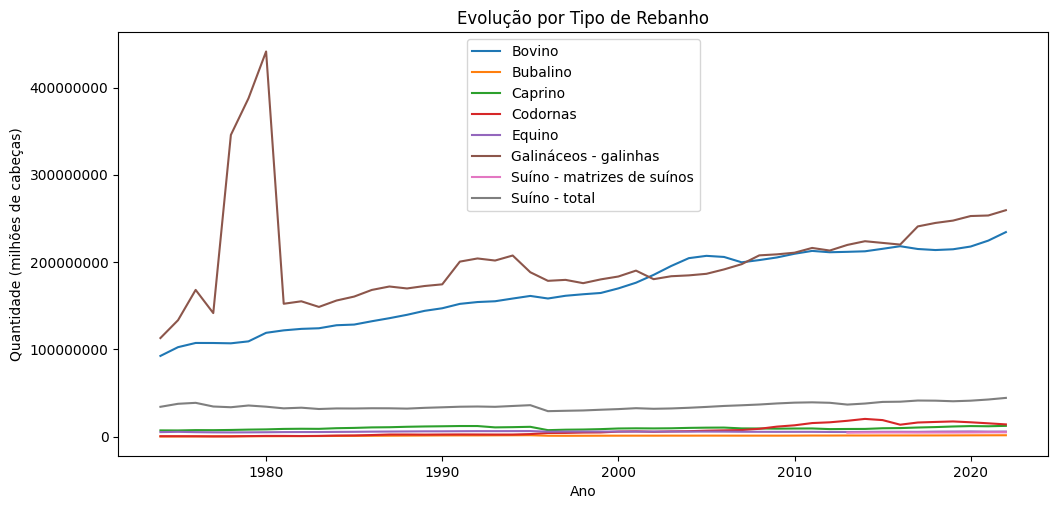

In [141]:
historico_rebanhos = (dados_rebanhos.groupby(['ano', 'tipo_rebanho'])['quantidade'].sum().unstack())
plt.figure(figsize=(12, 5.5))

plt.plot(historico_rebanhos)
plt.legend(historico_rebanhos.columns)
plt.title("Evolução por Tipo de Rebanho")
plt.xlabel("Ano")
plt.ylabel("Quantidade (milhões de cabeças)")

# Get current axis
ax = plt.gca() 
ax.ticklabel_format(style='plain', axis='y')

In [142]:
valor_1974_gln = dados_rebanhos.query("ano == 1974 and tipo_rebanho == 'Galináceos - galinhas'")['quantidade'].sum()
valor_2022_gln = dados_rebanhos.query("ano == 2022 and tipo_rebanho == 'Galináceos - galinhas'")['quantidade'].sum()

crescimento_pct_gln = ((valor_2022_gln - valor_1974_gln) / valor_1974_gln) * 100

print(f"{crescimento_pct_gln:.2f}% de crescimento da produção de rebanho do tipo Galináceos - galinhas")

valor_1974_bvn = dados_rebanhos.query("ano == 1974 and tipo_rebanho == 'Bovino'")['quantidade'].sum()
valor_2022_bvn = dados_rebanhos.query("ano == 2022 and tipo_rebanho == 'Bovino'")['quantidade'].sum()

crescimento_pct_bvn = ((valor_2022_bvn - valor_1974_bvn) / valor_1974_bvn) * 100

print(f"{crescimento_pct_bvn:.2f}% de crescimento da produção de rebanho Bovino")

129.64% de crescimento da produção de rebanho do tipo Galináceos - galinhas
153.37% de crescimento da produção de rebanho Bovino


## Verificando qual tipo de rebanho teve maior crescimento na última década e quais municípios são os maiores criadores desse tipo

In [143]:
ultimo_ano = dados_rebanhos['ano'].max()
inicio_analise = ultimo_ano - 10

maior_crescimento_decada = dados_rebanhos.query("ano == @inicio_analise or ano == @ultimo_ano") \
                    .groupby(['tipo_rebanho', 'ano'])['quantidade'].sum() \
                    .unstack() \
                    .assign(crescimento_pct=lambda x: ((x[ultimo_ano] - x[inicio_analise]) / x[inicio_analise] * 100)) \
                    .round(2) \
                    .sort_values('crescimento_pct', ascending=False)

maior_crescimento_decada

ano,2012,2022,crescimento_pct
tipo_rebanho,,,
Caprino,8646463.0,12366233.0,43.02
Bubalino,1261922.0,1598268.0,26.65
Galináceos - galinhas,213230493.0,259452999.0,21.68
Suíno - total,38795902.0,44393930.0,14.43
Bovino,211279082.0,234352649.0,10.92
Equino,5363185.0,5834544.0,8.79
Codornas,16436164.0,14028550.0,-14.65
Suíno - matrizes de suínos,NaN,4983937.0,NaN


In [144]:
top_10_caprino = dados_rebanhos.query("ano == 2022 and tipo_rebanho == 'Caprino'").nlargest(10, 'quantidade') 

top_10_caprino[['ano', 'sigla_uf', 'tipo_rebanho', 'quantidade', 'municipio', 'regiao']]

,ano,sigla_uf,tipo_rebanho,quantidade,municipio,regiao
567370,2022,BA,Caprino,690115,Casa Nova,Nordeste
1022559,2022,PE,Caprino,360000,Floresta,Nordeste
1022723,2022,BA,Caprino,339576,Juazeiro,Nordeste
1022698,2022,BA,Caprino,316475,Curaçá,Nordeste
567275,2022,PE,Caprino,290000,Petrolina,Nordeste
110787,2022,BA,Caprino,222296,Pilão Arcado,Nordeste
110794,2022,BA,Caprino,220017,Remanso,Nordeste
110815,2022,BA,Caprino,196410,Uauá,Nordeste
1022770,2022,BA,Caprino,166453,Sento Sé,Nordeste
567251,2022,PE,Caprino,158640,Custódia,Nordeste


## Filtrando os estados e regiões que lideram a produção de cada tipo de rebanho

In [147]:
filtro_2022 = dados_rebanhos.query('ano == 2022')

estados_lideres = filtro_2022.loc[filtro_2022.groupby('tipo_rebanho')['quantidade'].idxmax()]

estados_lideres[['ano', 'sigla_uf', 'tipo_rebanho', 'quantidade', 'municipio', 'regiao']]

,ano,sigla_uf,tipo_rebanho,quantidade,municipio,regiao
106527,2022,PA,Bovino,2522608,São Félix do Xingu,Norte
111817,2022,PA,Bubalino,216302,Chaves,Norte
567370,2022,BA,Caprino,690115,Casa Nova,Nordeste
112720,2022,ES,Codornas,2228871,Santa Maria de Jetibá,Sudeste
566585,2022,MS,Equino,44532,Corumbá,Centro-Oeste
572470,2022,ES,Galináceos - galinhas,13039505,Santa Maria de Jetibá,Sudeste
1030053,2022,PR,Suíno - matrizes de suínos,64609,Toledo,Sul
114364,2022,PR,Suíno - total,909879,Toledo,Sul


In [146]:
filtro_2022 = dados_rebanhos.query('ano == 2022')

filtros_por_regiao = (filtro_2022.groupby(['tipo_rebanho', 'regiao'])['quantidade'].sum().reset_index())
regioes_lideres = (filtros_por_regiao.sort_values('quantidade', ascending=False).drop_duplicates(subset='tipo_rebanho'))
regioes_lideres

,tipo_rebanho,regiao,quantidade
28,Galináceos - galinhas,Sudeste,91151436
0,Bovino,Centro-Oeste,77175767
39,Suíno - total,Sul,23022431
11,Caprino,Nordeste,11814590
18,Codornas,Sudeste,7789466
34,Suíno - matrizes de suínos,Sul,2165322
21,Equino,Nordeste,1343865
7,Bubalino,Norte,1088593


## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Bovino* está concentrado atualmente e onde estava concentrado em 1974

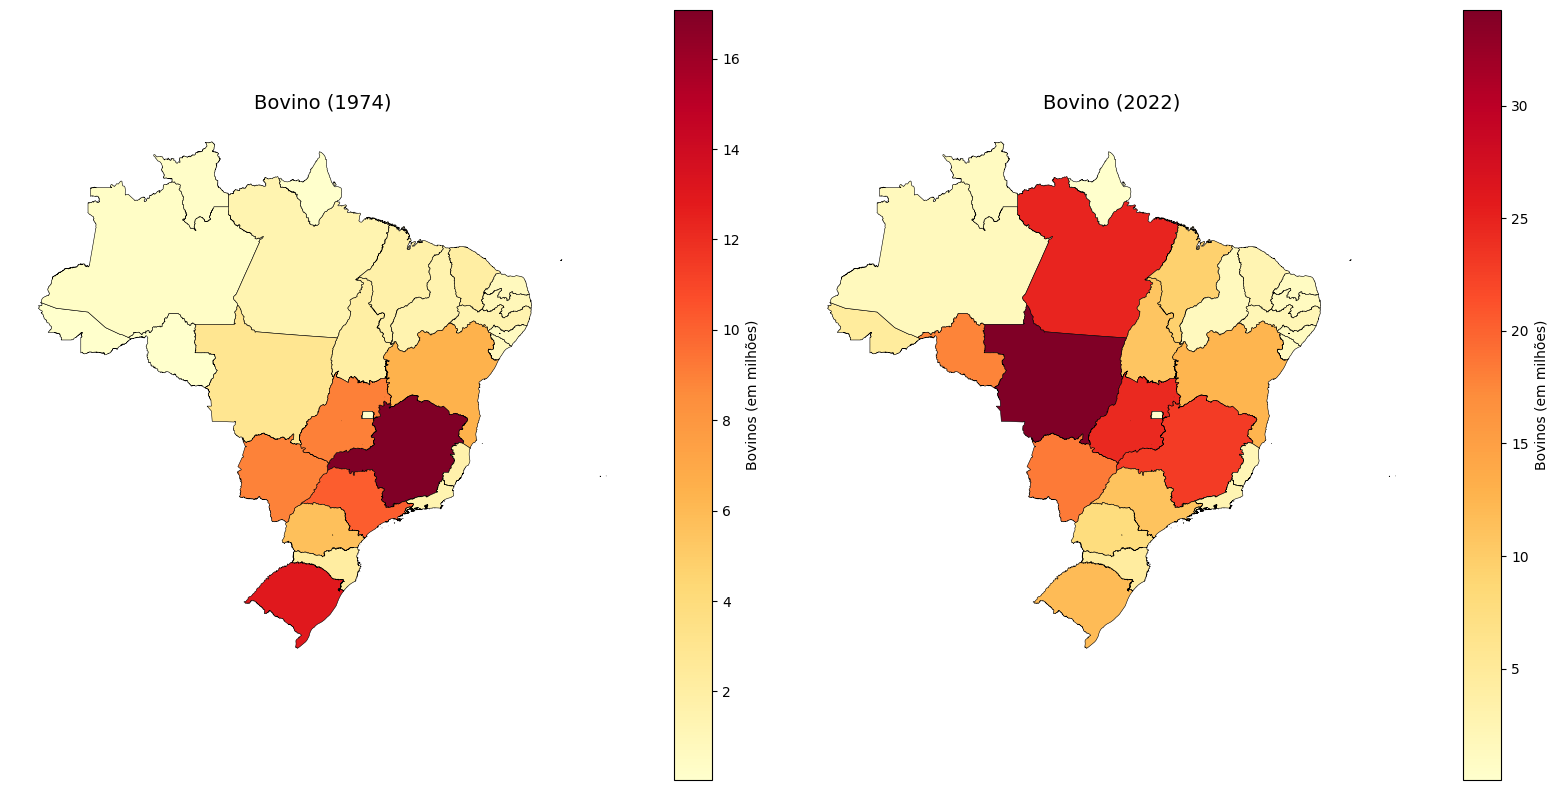

In [50]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Bovino
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Bovino' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Bovinos (em milhões)"
        }
    )

    ax.set_title(f'Bovino ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Equino* está concentrado atualmente e onde estava concentrado em 1974

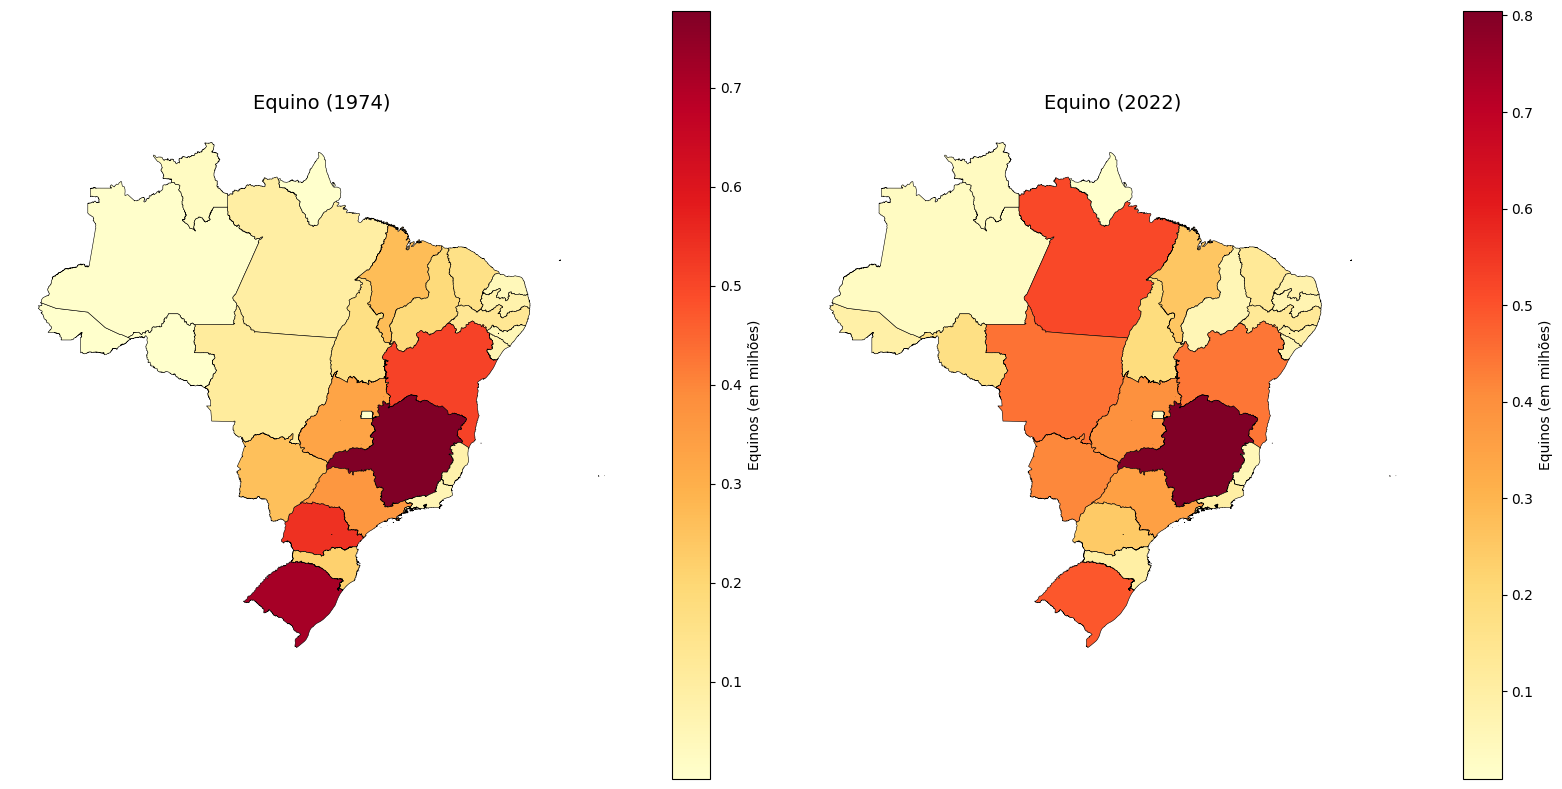

In [49]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Equino
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Equino' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Equinos (em milhões)"
        }
    )

    ax.set_title(f'Equino ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Caprino* está concentrado atualmente e onde estava concentrado em 1974

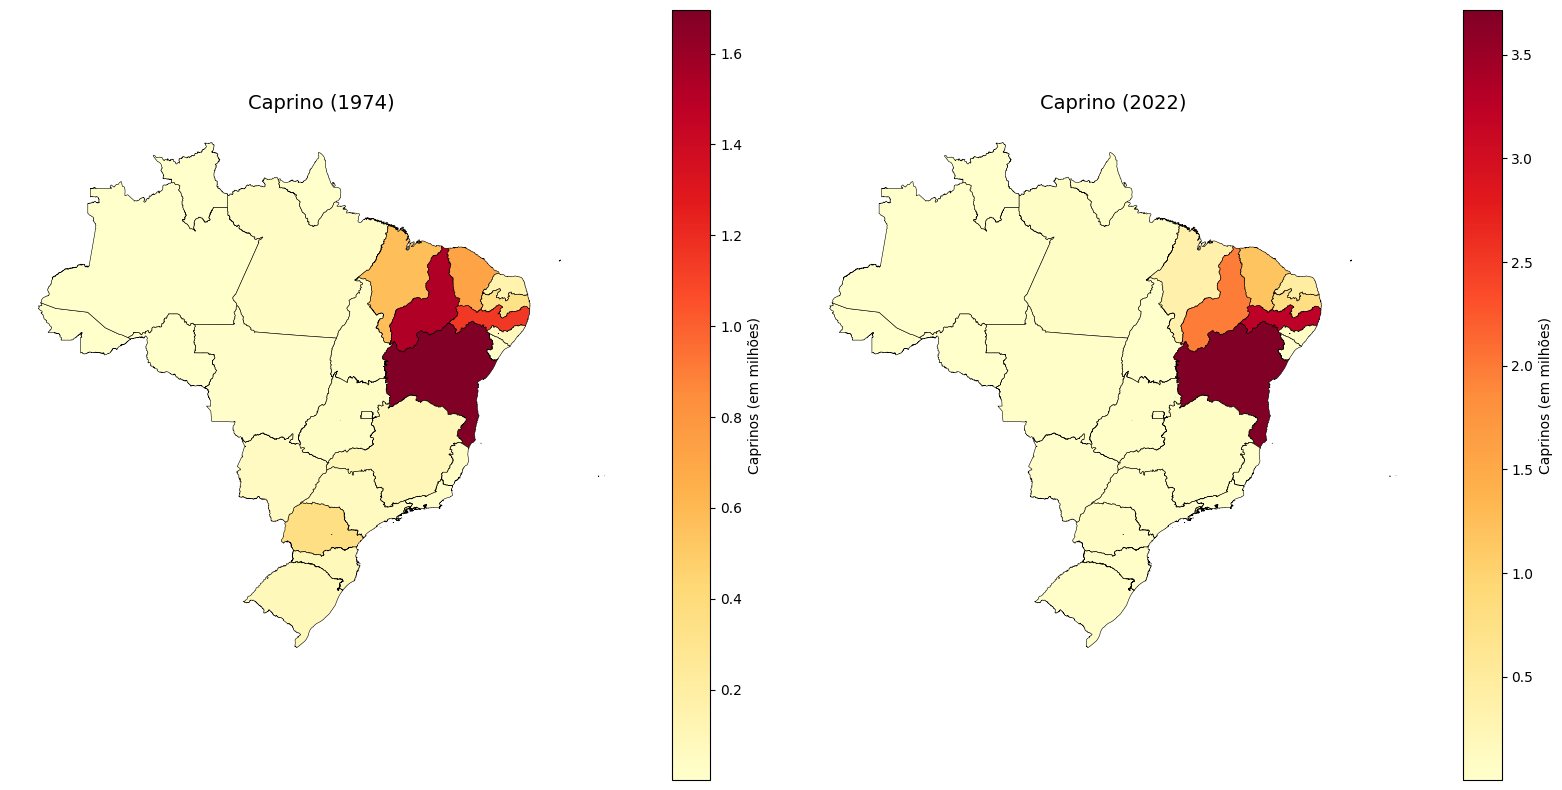

In [48]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Caprino
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Caprino' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Caprinos (em milhões)"
        }
    )

    ax.set_title(f'Caprino ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Bubalino* está concentrado atualmente e onde estava concentrado em 1974

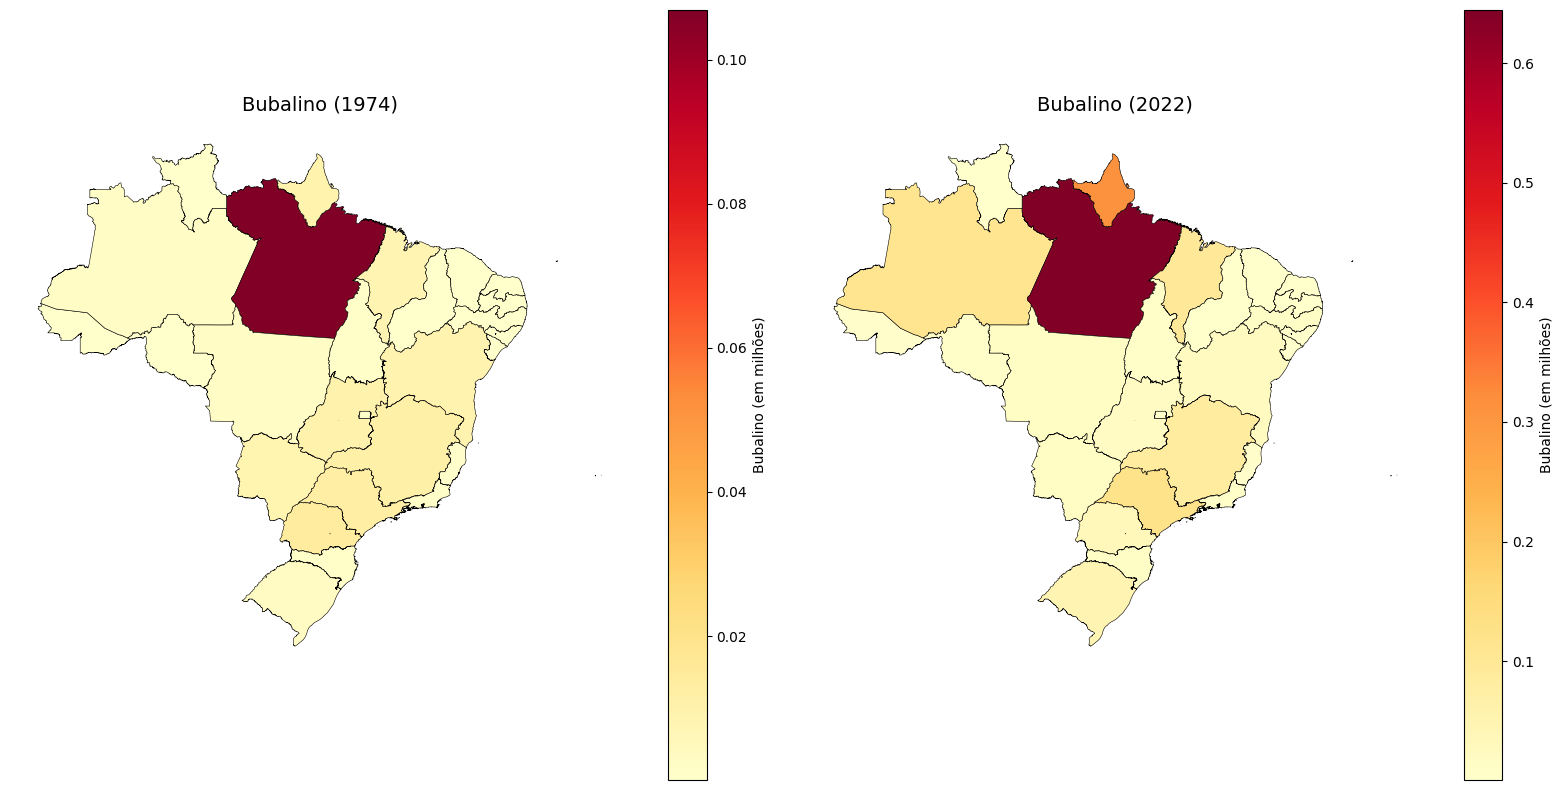

In [47]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Bubalino
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Bubalino' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Bubalino (em milhões)"
        }
    )

    ax.set_title(f'Bubalino ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Codornas* está concentrado atualmente e onde estava concentrado em 1974

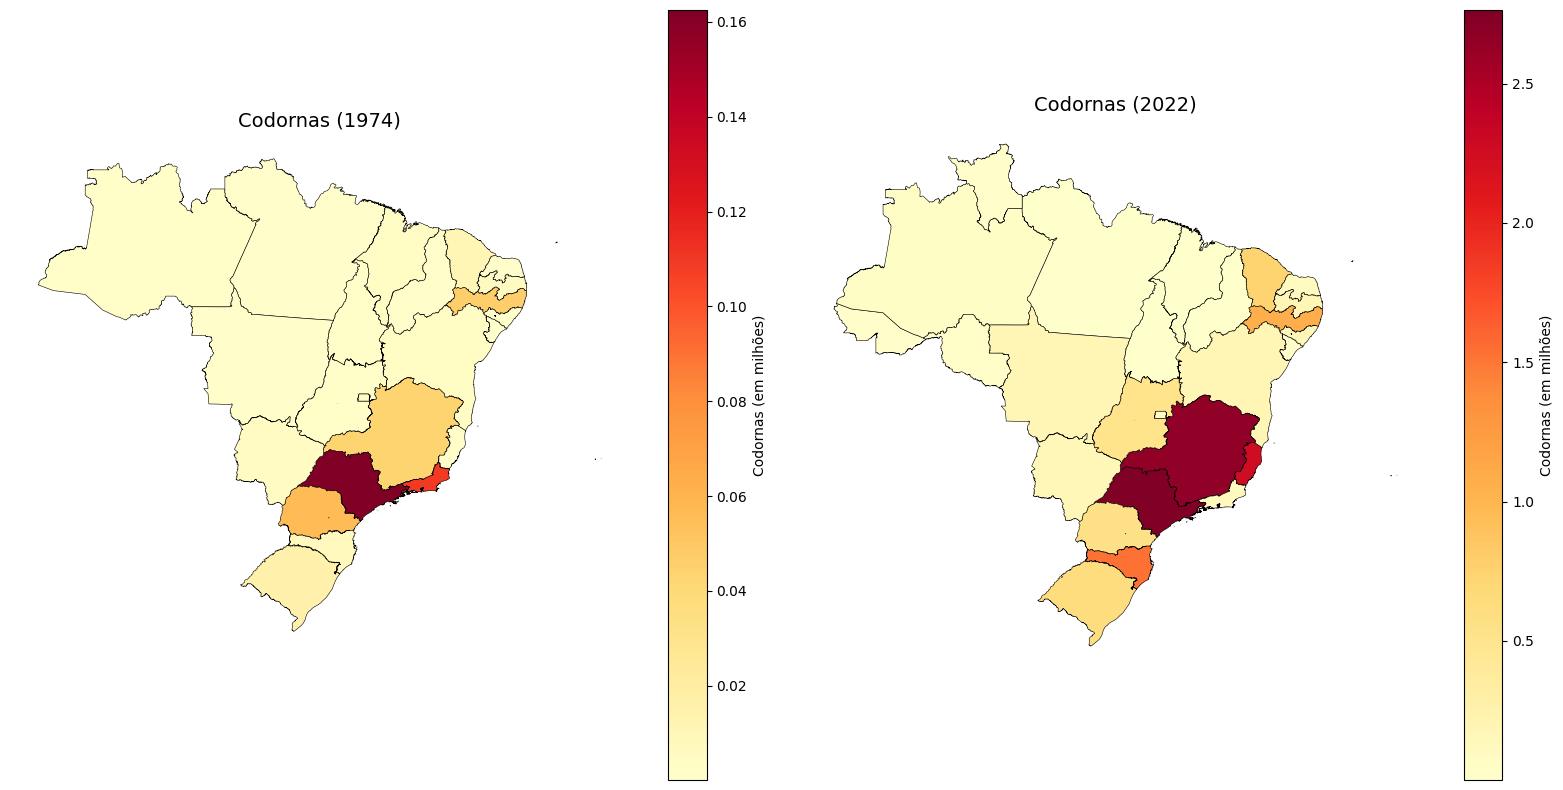

In [51]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Codornas
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Codornas' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Codornas (em milhões)"
        }
    )

    ax.set_title(f'Codornas ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Suíno - total* está concentrado atualmente e onde estava concentrado em 1974

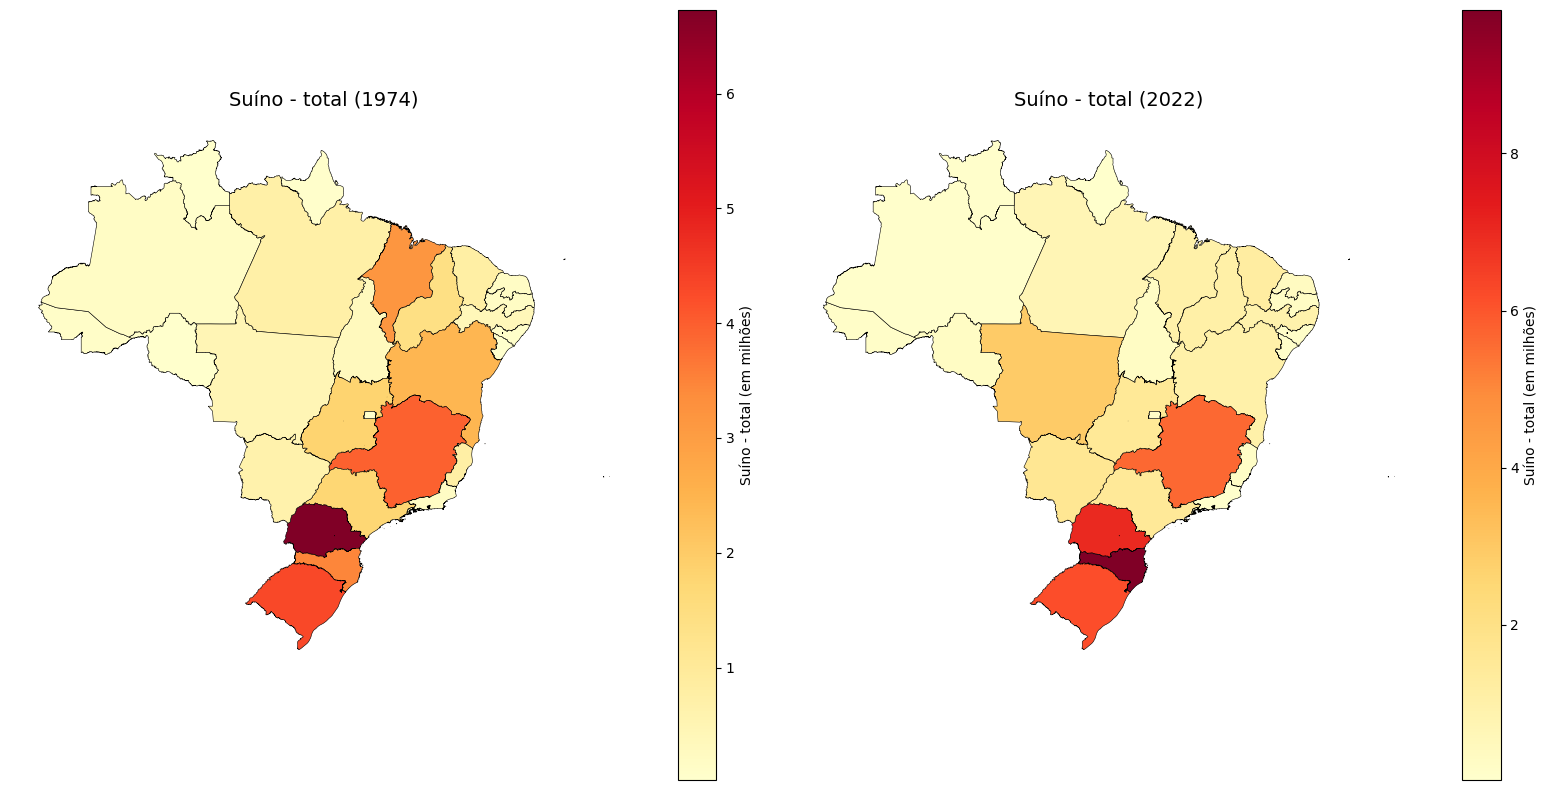

In [53]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Suíno - total
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Suíno - total' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Suíno - total (em milhões)"
        }
    )

    ax.set_title(f'Suíno - total ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Suíno - matrizes de suínos* está concentrado atualmente e onde estava concentrado em 1974

In [131]:
# Confirmação do ano em que os dados desse tipo de rebanho começaram a ser coletados
df_suino_matrizes_2012 = dados_rebanhos.query(
    "ano == 2012 and tipo_rebanho == 'Suíno - matrizes de suínos'"
)['quantidade'].sum()

print(df_suino_matrizes_2012)

# Os dados começaram a ser coletados a partir de 2013
df_suino_matrizes_2013 = dados_rebanhos.query(
    "ano == 2013 and tipo_rebanho == 'Suíno - matrizes de suínos'"
)['quantidade'].sum()

print(df_suino_matrizes_2013)

0
4615201


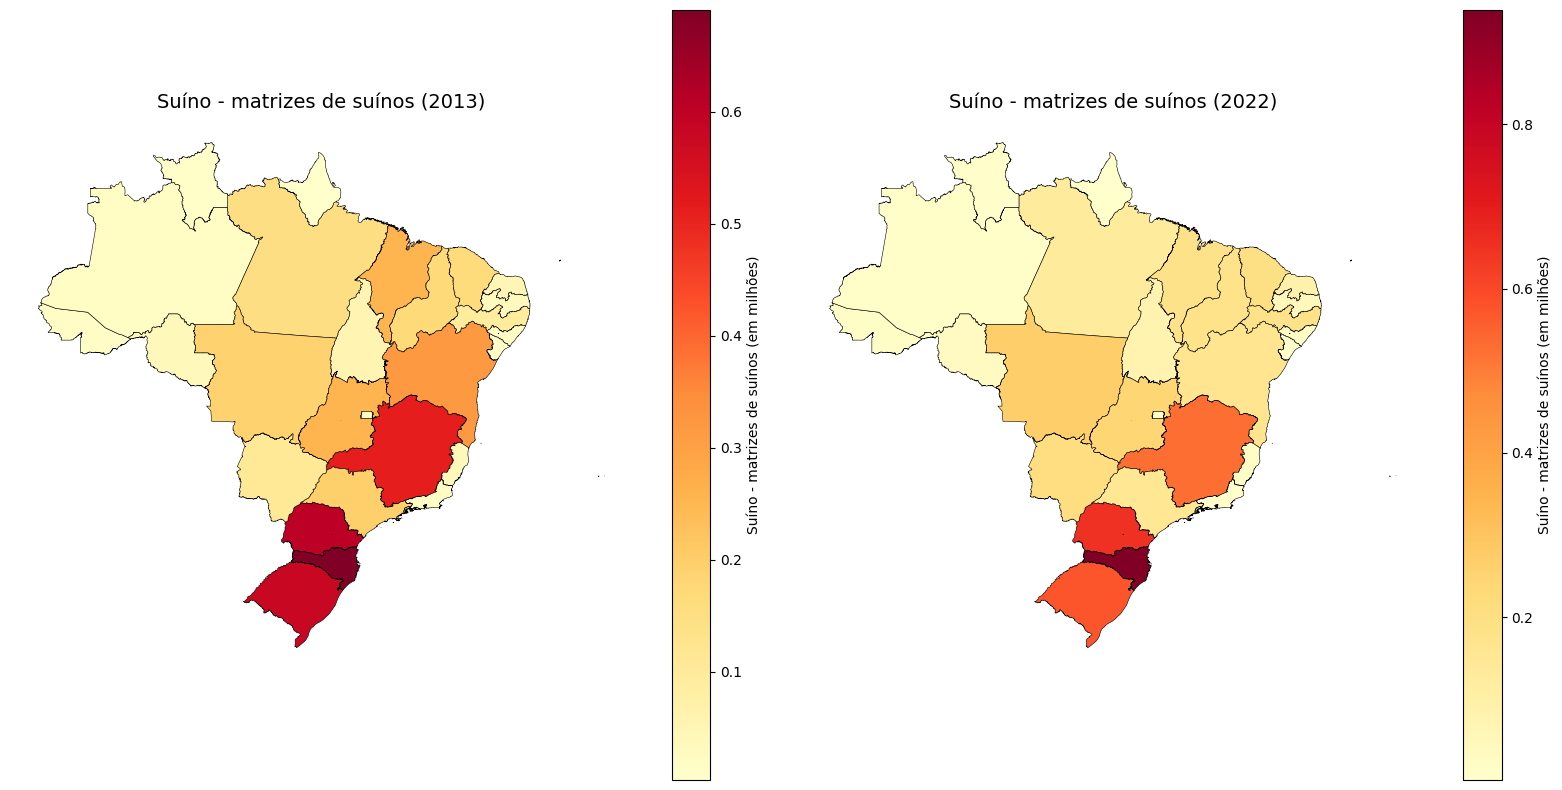

In [129]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Suíno - matrizes de suínos
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Suíno - matrizes de suínos' and ano in [2013, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [2013, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Suíno - matrizes de suínos (em milhões)"
        }
    )

    ax.set_title(f'Suíno - matrizes de suínos ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Mapa do Brasil com uma escala de calor que indica onde o rebanho do tipo *Galináceos - galinhas* está concentrado atualmente e onde estava concentrado em 1974

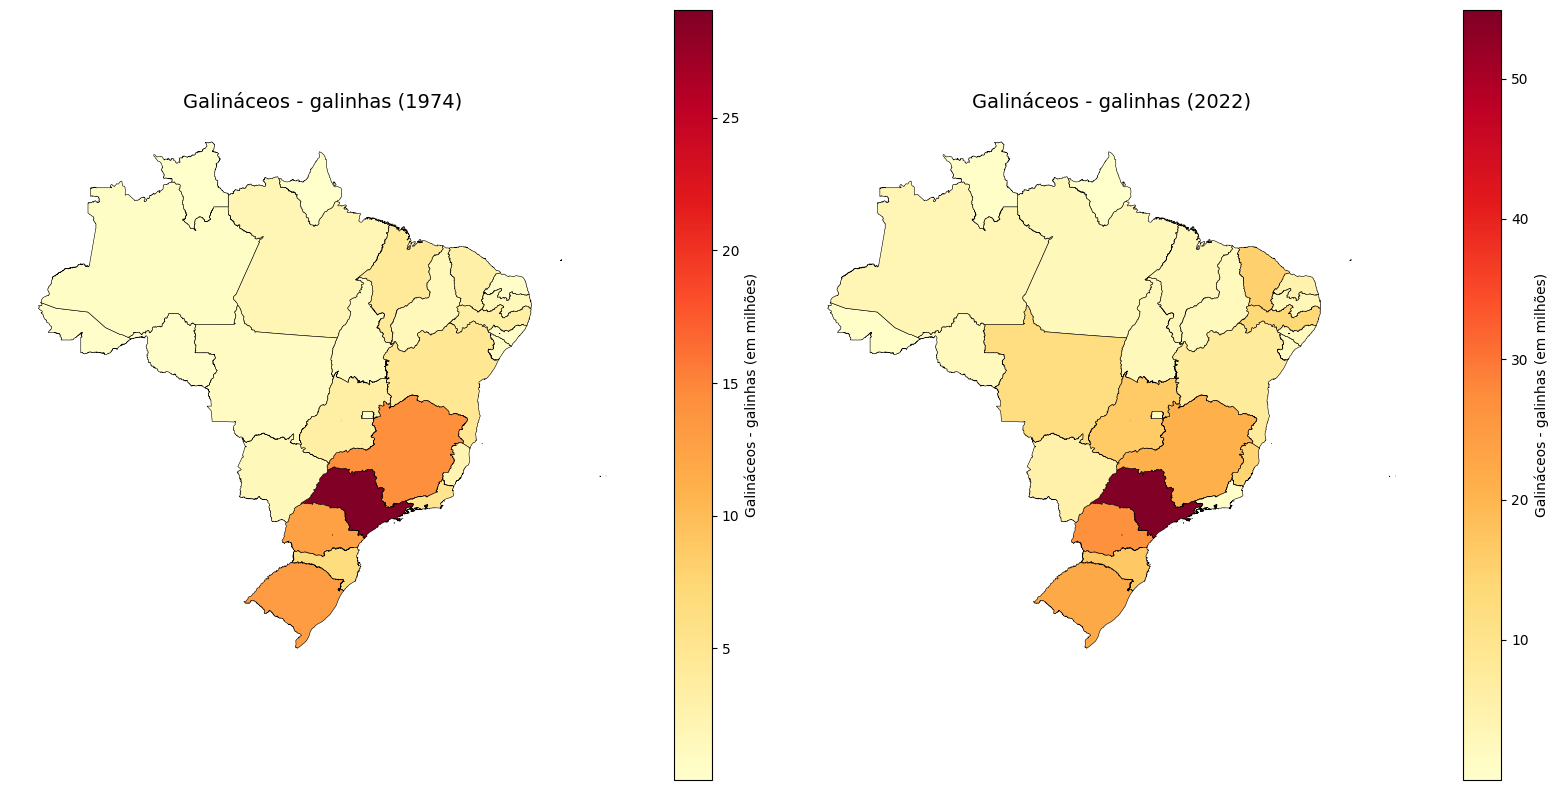

In [130]:
mapa_uf = gpd.read_file('C:/Users/win/Downloads/BR_UF_2022/BR_UF_2022.shp')

# Valores para mapa de calor do rebanho Galináceos - galinhas
ppm_agg = (
    dados_rebanhos
    .query("tipo_rebanho == 'Galináceos - galinhas' and ano in [1974, 2022]")
    .groupby(['sigla_uf', 'ano'], as_index=False)
    .agg(quantidade=('quantidade', 'sum'))
)

# Merge com mapa
mapa_ppm = mapa_uf.merge(ppm_agg, left_on='SIGLA_UF', right_on='sigla_uf', how='left')
mapa_ppm['quantidade_mi'] = mapa_ppm['quantidade'] / 1_000_000


# Plotando o mapa
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for ax, ano in zip(axes, [1974, 2022]):
    mapa_ppm[mapa_ppm['ano'] == ano].plot(
        column='quantidade_mi',
        cmap='YlOrRd',
        linewidth=0.4,
        edgecolor='black',
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "Sem dados"
        },
        legend_kwds={
            "label": "Galináceos - galinhas (em milhões)"
        }
    )

    ax.set_title(f'Galináceos - galinhas ({ano})', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Conclusões

## Evolução histórica dos rebanhos
- Os rebanhos de **Bovinos e Galináceos (galinhas)** se destacam como os mais representativos ao longo de toda a série histórica, apresentando crescimento consistente desde 1974.
- Entre 1974 e 2022, o **rebanho bovino cresceu aproximadamente 153%**, enquanto o **rebanho de galináceos cresceu cerca de 130%**, evidenciando a expansão da pecuária de corte e da avicultura no país.
- Alguns tipos de rebanho, como **Codornas**, apresentaram retração na última década, indicando mudanças estruturais ou de mercado nesse segmento.

## Crescimento na última década
- Na análise da última década (2012–2022), o **rebanho caprino** apresentou o **maior crescimento percentual**, com destaque para a forte concentração na **Região Nordeste**.
- O rebanho de **Suínos – matrizes de suínos** passou a ser registrado apenas a partir de **2013**, o que explica a ausência de dados em anos anteriores e impossibilita comparações de longo prazo com 1974.
- O crescimento mais moderado de bovinos e galináceos nesse período recente indica um possível estágio de maturidade desses setores.

## Liderança regional e municipal
- A **Região Centro-Oeste** lidera a produção de **bovinos**, reforçando seu papel histórico como principal polo da pecuária extensiva no Brasil.
- A **Região Sudeste** se destaca na produção de **galináceos** e **codornas**, evidenciando maior tecnificação e integração com cadeias agroindustriais.
- O **Sul do Brasil** lidera a produção de **suínos**, tanto no total quanto nas matrizes, refletindo a forte especialização regional.
- Municípios como **São Félix do Xingu (PA)**, **Casa Nova (BA)** e **Toledo (PR)** aparecem de forma recorrente como grandes produtores, demonstrando elevada concentração produtiva em localidades específicas.

## Análise espacial (mapas de calor)
- Os mapas de calor evidenciam uma **mudança e consolidação da distribuição geográfica** dos rebanhos ao longo do tempo.
- Observa-se maior concentração de bovinos no Centro-Oeste e Norte, enquanto rebanhos mais intensivos (suínos e aves) se concentram no Sul e Sudeste.
- A comparação entre 1974 e 2022 mostra uma clara **expansão territorial e intensificação produtiva**, especialmente nas regiões Centro-Oeste e Norte.

## Considerações finais
De forma geral, os resultados indicam que a pecuária brasileira passou por um **processo de expansão, especialização regional e modernização produtiva** ao longo das últimas décadas. A análise integrada de séries temporais, rankings municipais e mapas temáticos permitiu identificar padrões históricos, lideranças regionais e mudanças estruturais relevantes no setor pecuário nacional.